In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "/Users/bennetyousuf/Desktop/BCS/pymacueticals-challenge/02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "/Users/bennetyousuf/Desktop/BCS/pymacueticals-challenge/02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#Read study results
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
# Display the data table for preview

combined_table_df = pd.merge( mouse_metadata_df, study_results_df, on = "Mouse ID")
combined_table_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice

number_of_mice = len(combined_table_df["Mouse ID"].unique())
number_of_mice



249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Display all data that appears for duplicate mice

duplicate_mice_df = combined_table_df.loc[combined_table_df.duplicated(subset=["Mouse ID", "Timepoint"])==True]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame dropping all duplicate mice values
# Create using .loc function on combined data frame to return only rows that are False when looking for duplicate rows based on "Mouse ID" and "Timepoint"

unique_mice_df = combined_table_df.loc[combined_table_df.duplicated(subset=["Mouse ID", "Timepoint"])==False]
unique_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Group by Drug Regimen - Mean
tumor_volume_df = unique_mice_df.loc[:, ["Tumor Volume (mm3)","Drug Regimen"]]
tumor_volume_mean = tumor_volume_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Group by Drug Regimen - Median
tumor_volume_median = tumor_volume_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Group by Drug Regimen - Variance
tumor_volume_variance = tumor_volume_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Group by Drug Regimen - Standard Deviation
tumor_volume_standard_deviation = tumor_volume_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Group by Drug Regimen - SEM
tumor_volume_sem = unique_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Summary Statistics
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
#Generate Data Frame for Summary Statistics

summary_statistics_table = pd.DataFrame({
    "Mean":tumor_volume_mean,
    "Median":tumor_volume_median,
    "Variance":tumor_volume_variance,
    "Standard Deviation":tumor_volume_standard_deviation,
    "SEM":tumor_volume_sem})

summary_statistics_table 


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
#Summary Statistics
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_statistics = tumor_volume_df.groupby(["Drug Regimen"])
tumor_volume_statistics.describe()


NameError: name 'tumor_volume_df' is not defined

In [15]:
#Bar and Pie Charts
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Create y axis as the value count of each drug regimen

count_drug_regimen = unique_mice_df["Drug Regimen"].value_counts()
y_axis = count_drug_regimen
y_axis


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [16]:
#Bar and Pie Charts
#Generate a bar plot showing the total number of measurements taken on each drug regimen using Matplotlib's pyplot.
#Import Dependencies, import matplotlib inline to allow for charts to appear per cell

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [17]:
#Bar and Pie Charts
#Generate a bar plot showing the total number of measurements taken on each drug regimen using Matplotlib's pyplot.
#Create y axis as the value count of each drug regimen


count_drug_regimen = unique_mice_df["Drug Regimen"].value_counts()
y_axis = count_drug_regimen
y_axis



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [18]:
#Bar and Pie Charts
#Generate a bar plot showing the total number of measurements taken on each drug regimen using Matplotlib's pyplot.
#Create x axis as the number of drugs

count_drug_regimen = combined_table_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

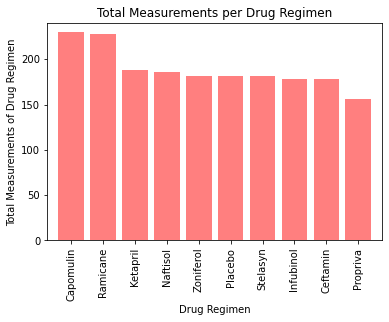

In [19]:
#Bar and Pie Charts
#Plot total number of measurements taken on each drug regimen using pyplot, set title, set x and y labels

plt.bar(x_axis, y_axis, color ="r",alpha =0.5, align = "center")
plt.xticks(x_axis, y_axis.index, rotation ="vertical")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis)+10)
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements of Drug Regimen")
plt.bar

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Measurements of Drug Regimen'>

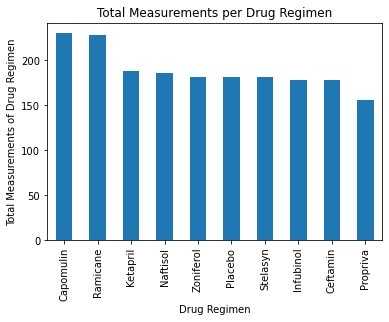

In [20]:
# #Bar and Pie Charts using Pandas

count_drug_regimen = unique_mice_df["Drug Regimen"].value_counts()
count_drug_regimen_df =count_drug_regimen
count_drug_regimen_df.plot(kind = "bar", title = "Total Measurements per Drug Regimen", xlabel="Drug Regimen", ylabel= "Total Measurements of Drug Regimen")

<AxesSubplot:title={'center':'Distribtion of Male and Female Mice'}>

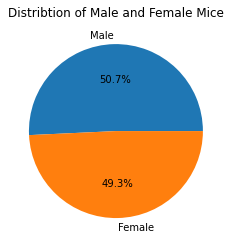

In [21]:
#Bar and Pie Charts using Pandas
#Create dataframe showing valuecount of gender in Sex column
gender_mice_df = unique_mice_df["Sex"].value_counts()
gender_mice_df.plot(kind ="pie", ylabel = "", title ="Distribtion of Male and Female Mice",autopct="%1.1f%%")




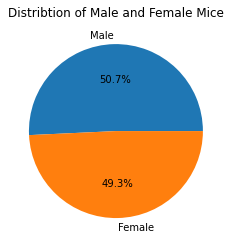

In [22]:
#Bar and Pie Charts using Matplotlib
#Create 
gender_mice_df = unique_mice_df["Sex"].value_counts()
gender_label = gender_mice_df.index
plt.pie(gender_mice_df, labels = gender_label,autopct="%1.1f%%")
plt.title("Distribtion of Male and Female Mice")
plt.show()

In [28]:
#Calculate Greatest Timepoint per Mouse ID- Groupby Mouse ID, max timepoint
#Reset Index to later be able to join on original DF unique_mice_df
max_timepoint = unique_mice_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [29]:
#Display new merged data frame that shows all mice id and their tumor volume at their final timepoint. Note: merged data frame merges new and original data frame on mice id and timepoint, so timepoint values now show the max timepoint values 
merged_df = max_timepoint.merge(unique_mice_df, on =["Mouse ID","Timepoint"], how ="left")
merged_df 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [50]:
#Quartiles, Outliers, Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens

# Find final (max) timepoint for each mouse
max_timepoint = unique_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Create new merged data frame that shows max timepoint of each mouse. Note: since merged on mouseid and timepoint, values at final timepoint will be returned
merged_df = max_timepoint.merge(unique_mice_df,on=['Mouse ID','Timepoint'],how="left")

In [51]:
#Quartiles, Outliers, Boxplots


treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Put treatments into a list for for loop (and later for plot labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}’s potential outliers: {outliers}")

Capomulin’s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane’s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol’s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin’s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


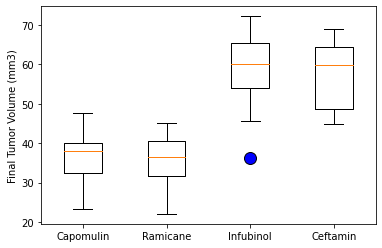

In [52]:
outlier = dict(markerfacecolor='blue',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [59]:
#Line and Scatter Plots
#Generate line plot measuring tumor volume vs timepoint for mouse treated with Capomulin 

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse_df = merged_df.loc[unique_mice_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_df = capomulin_mouse_df.reset_index()
capomulin_mouse_df


,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,10,a520,45,Ramicane,Male,13,21,38.810366,1
1,11,a577,30,Infubinol,Female,6,25,57.031862,2
2,12,a644,45,Ramicane,Female,7,17,32.978522,1
3,13,a685,45,Infubinol,Male,8,30,66.083066,3
4,14,a699,45,Propriva,Female,5,28,62.191414,1
...,...,...,...,...,...,...,...,...,...
110,240,y793,45,Capomulin,Male,17,17,31.896238,2
111,241,y865,45,Ceftamin,Male,23,26,64.729837,3
112,242,z234,5,Naftisol,Female,19,27,46.129357,1
113,243,z314,5,Stelasyn,Female,21,28,45.934712,0


In [64]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Create Dataframe for chosen mouse on Capomulin
capomulin_mouse = capomulin_mouse_df.loc[capomulin_mouse_df["Mouse ID"] == "y793"]
capomulin_mouse

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
110,240,y793,45,Capomulin,Male,17,17,31.896238,2


<AxesSubplot:xlabel='Timepoint'>

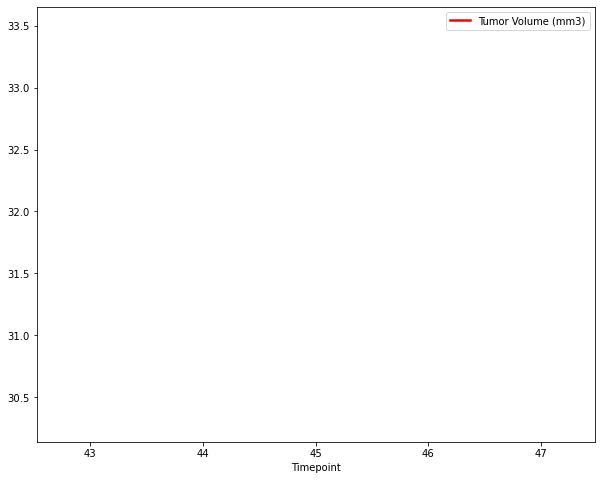

In [72]:
#Arrange data into two columns
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset index and create line plot showing the tumor volume for mice treated with Capomulin
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

In [61]:
merged_df_new = merged_df.set_index(["Drug Regimen"])
merged_df_new

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Placebo,a262,45,Female,17,29,70.717621,4
Ceftamin,a275,45,Female,20,28,62.999356,3
Stelasyn,a366,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
Propriva,z435,10,Female,12,26,48.710661,0
Ramicane,z578,45,Male,11,16,30.638696,0
Infubinol,z581,45,Female,24,25,62.754451,3


In [ ]:
ramicane_df = merged_df_new.loc[merged_df_new["Drug Regimen"] == "Ramicane"]
ramicane_df  

# ":,["Drug Regimen"]= "Ramicane" ==True]
# df.loc[df['shield'] > 35] = 0
# df

#  combined_table_df.loc[combined_table_df.duplicated(subset=["Mouse ID", "Timepoint"])==True]
# duplicate_mice_df

In [ ]:
#Final Tumor Volume Ramicane
#Create new series returning results for just the drug regimen Ramicane from the merged_df (that brought in final timepoint for each mice id).Index that data frame to pull just tumor volumes that are needed for quartiling and IQR

ramicane_df = merged_df[merged_df["Drug Regimen"].isin(["Ramicane"])]
ramicane_df_tumor_vol = ram_df["Tumor Volume (mm3)"]
ramicane_df_tumor_vol

In [ ]:
#Final Tumor Volume Ramicane - Quartiling and IQR
ramicane_quartiles = ramicane_df_tumor_vol.quantile([.25,.5,.75])
ramicane_IQR = ramicane_quartiles[.75]-ramicane_quartiles[.25]
ramicane_IQR

In [ ]:
#Final Tumor Volume Infubinol
infubinol_df = merged_df[merged_df["Drug Regimen"].isin(["Infubinol"])]
infubinol_df_tumor_vol = infubinol_df["Tumor Volume (mm3)"]
infubinol_df_tumor_vol 

In [ ]:
#Final Tumor Volume Infubinol - Quartiling and IQR
infubinol_quartiles = infubinol_df_tumor_vol.quantile([.25,.5,.75])
infubinol_IQR = infubinol_quartiles[.75]-infubinol_quartiles[.25]
infubinol_IQR

In [ ]:
ceftamin = merged_df["Drug Regimen"].isin(["Ceftamin"])
final_tumor_volume_ceftamin = merged_df[ceftamin]
final_tumor_volume_ceftamin

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_df = combined_table_df.groupby(["Drug Regimen"]).last()["Tumor Volume (mm3)"].sort_values(ascending = False)
final_tumor_volume_df

promising_drugs = ["Ceftamin", "Ramicane", "Capomulin", "Infubinol"]
promising_drugs_df = final_tumor_volume_df[promising_drugs]
promising_drugs_df 

In [ ]:
final_tumor_volume_df = combined_table_df.groupby(["Drug Regimen"]).max()["Timepoint"]
final_tumor_volume_df

In [ ]:
final_tumor_volume_df = combined_table_df.groupby(["Drug Regimen"]).last()["Tumor Volume (mm3)"].sort_values(ascending = False)
final_tumor_volume_df

In [ ]:
promising_drugs_quartile = promising_drugs_df.quantile([.75,.5,.25])
promising_drugs_quartile
IQR = promising_drugs_quartile[.75] -promising_drugs_quartile[.25]
IQR